# **ML Assignment 2 – Data Pre-Processing**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,  OneHotEncoder, LabelEncoder

In [35]:
dataset = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv"
df= pd.read_csv(dataset)
df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [37]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [38]:
df1=df.copy()

# 1.	Data Cleaning:

### 1.1.	Rename Columns: 

In [39]:
df1 = df.rename(columns={'ID': 'Visit_ID', 'No_Pation': 'Patient_ID' }) 
df1.columns

Index(['Visit_ID', 'Patient_ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c',
       'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

### 1.2.	Check Unique Values in Categorical Columns:

In [40]:
print("Gender: \n M (Male)\n F (Female)")
df1['Gender'].unique()

Gender: 
 M (Male)
 F (Female)


array(['F', 'M', nan, 'f'], dtype=object)

In [41]:
df1['Gender']=df1['Gender'].replace('f','F')
df1['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [42]:
print("CLASS:  \nN (No diabetes), \nP (Pre-diabetes), \nY (Yes, Diabetes).") 
df1['CLASS'].unique()

CLASS:  
N (No diabetes), 
P (Pre-diabetes), 
Y (Yes, Diabetes).


array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [43]:
df1['CLASS']=df1['CLASS'].replace('N ','N')
df1['CLASS']=df1['CLASS'].replace('Y ','Y')
df1['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

### 1.3.	Statistical Summary of Numerical Columns

In [44]:
Numerical_Columns = [ "AGE", "Urea", "Cr", "HbA1c" ,"Chol", "TG", "HDL", "LDL", "VLDL", "BMI"]
for column in Numerical_Columns:
    print(f"\n {column} values :")
    print("-" * 25)
    # Mean
    mean = df[column].mean()
    print(f"Mean  : {mean}")
    
    # Median
    median = df[column].median()
    print(f"Median  : {median}")
    
    # Mode
    mode = df[column].mode()[0]
    print(f"Mode : {mode}")
    
    # Minimum
    minimum = df[column].min()
    print(f"Minimum  : {minimum}")
    
    # Maximum
    maximum = df[column].max()
    print(f"Maximum  : {maximum}")
    
    # Standard Deviation
    std_dev = df[column].std()
    print(f"Standard Deviation : {std_dev:.3f}")


 AGE values :
-------------------------
Mean  : 53.59623015873016
Median  : 55.0
Mode : 55.0
Minimum  : 25.0
Maximum  : 79.0
Standard Deviation : 8.744

 Urea values :
-------------------------
Mean  : 5.132979166666666
Median  : 4.6
Mode : 4.3
Minimum  : 0.5
Maximum  : 38.9
Standard Deviation : 2.931

 Cr values :
-------------------------
Mean  : 68.93843098311817
Median  : 60.0
Mode : 56.0
Minimum  : 6.0
Maximum  : 800.0
Standard Deviation : 59.816

 HbA1c values :
-------------------------
Mean  : 8.281371769383698
Median  : 8.0
Mode : 8.0
Minimum  : 0.9
Maximum  : 16.0
Standard Deviation : 2.535

 Chol values :
-------------------------
Mean  : 4.862482621648462
Median  : 4.8
Mode : 4.4
Minimum  : 0.0
Maximum  : 10.3
Standard Deviation : 1.299

 TG values :
-------------------------
Mean  : 2.3467825223435947
Median  : 2.0
Mode : 2.1
Minimum  : 0.3
Maximum  : 13.8
Standard Deviation : 1.396

 HDL values :
-------------------------
Mean  : 1.2027281746031746
Median  : 1.1
Mode : 1

In [45]:
df1.describe()

,Visit_ID,Patient_ID,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,338.166501,2.717468e+05,53.596230,5.132979,68.938431,8.281372,4.862483,2.346783,1.202728,2.611708,1.850496,29.573062
std,239.479644,3.365681e+06,8.743882,2.930873,59.815673,2.534861,1.298665,1.396438,0.658038,1.115990,3.649872,4.953338
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,126.000000,2.406400e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,294.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,547.000000,4.539100e+04,59.000000,5.700000,73.000000,10.175000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### 1.4.	Box Plot of Numerical Columns: 

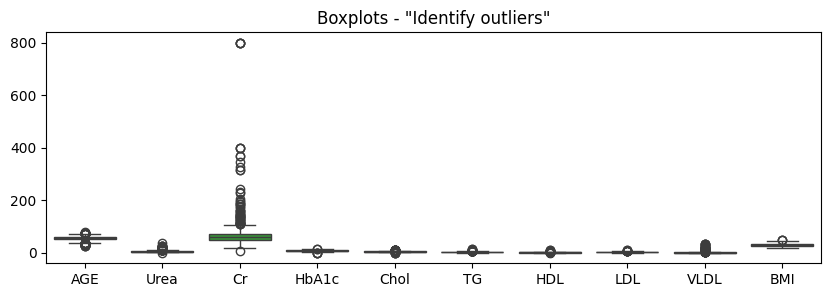

In [46]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df1[Numerical_Columns])
plt.title('Boxplots - "Identify outliers"')
plt.show()

### 1.5.	Identify Missing (Null) Values: 

In [47]:
df1.isna().sum()

Visit_ID      0
Patient_ID    0
Gender        3
AGE           1
Urea          1
Cr            2
HbA1c         3
Chol          2
TG            2
HDL           1
LDL           2
VLDL          1
BMI           0
CLASS         0
dtype: int64

### 1.6.	Impute Missing Values:

In [48]:
df1['Gender'] = df1['Gender'].fillna('Unknown')

In [49]:
cols_to_fil_mode=['AGE','Urea','Cr']
for col in cols_to_fil_mode:
  df1[col]=df1[col].fillna(df1[col].mode()[0])

In [50]:
cols_to_fil_mean=['HbA1c','Chol','TG']
for col in cols_to_fil_mean:
  df1[col]=df1[col].fillna(df1[col].mean())

In [51]:
cols_to_fil_median=['HDL','LDL','VLDL']
for col in cols_to_fil_median:
  df1[col]=df1[col].fillna(df1[col].median())

In [52]:
df1.isna().sum()

Visit_ID      0
Patient_ID    0
Gender        0
AGE           0
Urea          0
Cr            0
HbA1c         0
Chol          0
TG            0
HDL           0
LDL           0
VLDL          0
BMI           0
CLASS         0
dtype: int64

### 1.7.	Outlier Handling: 

#### a.	Retain Outliers: 

> Retain outliers in the AGE, HbA1c, and BMI columns, explaining why they should be preserved.

- AGE   - Ages are " very young or very old patients "
- HbA1c - These are both " Extremely high HbA1c & Extremely high HbA1c "
- BMI   - BMI is Extremely " low or high BMI values " (underweight,obesity)
  
#### > "Retaining outliers in these columns means we keep all the data points as they are, without changing or removing any of them."


#### b.	Filter Outliers

In [67]:
# cr 99.5%
cr_99_5 = np.percentile(df1['Cr'], 99.5)
print(f"99.5th Percentile for Cr: {cr_99_5}")
# urea 99.9%
urea_99_9 = np.percentile(df1['Urea'], 99.9)
print(f"99.9th Percentile for Urea: {urea_99_9}")

df_filtered = df1[(df1['Cr'] <= cr_99_5) & (df1['Urea'] <= urea_99_9)]
df_filtered

99.5th Percentile for Cr: 5.543207054827168
99.9th Percentile for Urea: 7.253972601627386


,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,-0.409378,-0.146103,-0.383127,-1.336705,-0.511462,-1.035582,1.815205,-1.085265,-0.370579,-1.125198,0
1,735,34221,1,-3.160068,-0.214314,-0.116024,-1.336705,-0.896300,-0.677623,-0.157255,-0.458341,-0.343244,-1.327028,0
2,420,47975,0,-0.409378,-0.146103,-0.383127,-1.336705,-0.511462,-1.035582,1.815205,-1.085265,-0.370579,-1.125198,0
3,680,87656,0,-0.409378,-0.146103,-0.383127,-1.336705,-0.511462,-1.035582,1.815205,-1.085265,-0.370579,-1.125198,0
4,504,34223,1,-2.357783,0.672429,-0.383127,-1.336705,0.027311,-0.963990,-0.612438,-0.547902,-0.397914,-1.730688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,185,454316,1,1.195191,1.252222,0.618507,0.087028,0.796988,-0.176481,-0.005527,1.243310,-0.179233,0.489444,2
998,187,454316,0,0.736743,-0.043787,-0.216188,-0.071165,0.258214,0.682620,0.297928,-1.801750,0.312799,-0.519707,2
1001,191,454316,1,0.163683,-0.282525,-0.116024,-0.585290,0.335182,-0.248073,-0.308982,0.795507,-0.261239,0.105967,2
1002,192,454316,1,0.163683,-0.111998,0.318017,0.000565,0.643052,1.183762,-0.460710,0.616386,-0.015223,0.085784,2


#### c.	Remove Extreme Outliers:  

In [54]:
''' c.	Remove Extreme Outliers: For lipid-related columns (LDL, VLDL, HDL, TG, Chol), 
remove extreme outliers using an appropriate method such as IQR or  Z-score. '''

lipid_columns = ['LDL', 'VLDL', 'HDL', 'TG', 'Chol']
for column in lipid_columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    Lowerbound = Q1 - 1.5 * IQR
    Upperbound = Q3 + 1.5 * IQR

    newdf = df1[(df1[column] >= Lowerbound) & (df1[column] <= Upperbound)]

    print(f"{column} column:")
    print("-" * 15)
    print(f"Q1 = '{Q1}'")
    print(f"Q3 = '{Q3}'")
    print(f"IQR: '{IQR:.3f}'")
    print(f"Lower Bound: '{Lowerbound:.3f}' \nUpper Bound: '{Upperbound:.3f}'")
    print("\n")

LDL column:
---------------
Q1 = '1.8'
Q3 = '3.3'
IQR: '1.500'
Lower Bound: '-0.450' 
Upper Bound: '5.550'


VLDL column:
---------------
Q1 = '0.7'
Q3 = '1.5'
IQR: '0.800'
Lower Bound: '-0.500' 
Upper Bound: '2.700'


HDL column:
---------------
Q1 = '0.9'
Q3 = '1.3'
IQR: '0.400'
Lower Bound: '0.300' 
Upper Bound: '1.900'


TG column:
---------------
Q1 = '1.5'
Q3 = '2.9'
IQR: '1.400'
Lower Bound: '-0.600' 
Upper Bound: '5.000'


Chol column:
---------------
Q1 = '4.0'
Q3 = '5.6'
IQR: '1.600'
Lower Bound: '1.600' 
Upper Bound: '8.000'




### 1.8.	Check for Duplicates:  

In [55]:
df1[df1.duplicated()]

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
999,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1000,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1003,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N
1008,62,46059,M,55.0,7.0,56.0,9.1,3.7,1.9,0.7,2.3,0.9,27.0,Y


In [56]:
df1.drop_duplicates(inplace=True)

In [57]:
df1.duplicated().sum()

0

# 2.	Data Transformation:

### 2.1.	Feature Engineering: 

In [58]:
df1['Gender']=LabelEncoder().fit_transform(df1['Gender'])

In [59]:
df1['CLASS']=LabelEncoder().fit_transform(df1['CLASS'])

In [60]:
df1.head(5)

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [61]:
df1['CLASS'].unique()

array([0, 1, 2])

## 2.2.	Feature Scaling

In [66]:
scaler = StandardScaler()
# standardization to the numerical columns
df1[Numerical_Columns] = scaler.fit_transform(df1[Numerical_Columns])

print(df1[Numerical_Columns].mean()) 
print( "\n")
print(df1[Numerical_Columns].std()) 

AGE      0.000000e+00
Urea     0.000000e+00
Cr       5.318434e-18
HbA1c    0.000000e+00
Chol     0.000000e+00
TG       0.000000e+00
HDL      1.950092e-17
LDL      7.091245e-18
VLDL    -7.091245e-18
BMI      1.418249e-17
dtype: float64


AGE      1.000499
Urea     1.000499
Cr       1.000499
HbA1c    1.000499
Chol     1.000499
TG       1.000499
HDL      1.000499
LDL      1.000499
VLDL     1.000499
BMI      1.000499
dtype: float64
